In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a SVM Classifier
svc = SVC(kernel="linear", C=1)

# RFE with a specified number of features
num_features_to_select = 30  # For example, we select 30 features
rfe = RFE(estimator=svc, n_features_to_select=num_features_to_select)

# Fit RFE
rfe.fit(X_train, y_train)

# Print the ranking of features
print("Feature Ranking: ", rfe.ranking_)

# Test the model on the test set
y_pred = rfe.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy: {:.2f}%".format(accuracy * 100))


Feature Ranking:  [35 20  1  5  1  1  1 22 27 12  1 13  1  9 16 23 25 14  1  1  1  1  1 24
 26  4  1  1  1  1  8 29 34  3  1 10  1  1  1 33 31 15  1  1 11  1  1 32
 28 18  1  6  1  1  1 19 30 21  1  1  7  1  2 17]
Model Accuracy: 96.30%


RFE Process: RFE works by iteratively building a model and removing the least important feature at each iteration. The importance of a feature is typically determined by the feature's weight (or coefficient) in the model. For example, in linear models, features with the smallest absolute coefficients are often considered the least important.

Ranking of Features: At the end of this iterative process, each feature is assigned a rank. The rank indicates the iteration number at which a feature was removed. Features that survive until the end of the process (i.e., are not removed in any iteration) are considered the most important and are assigned a rank of 1.

Interpretation of Rank 1: So, a feature with rank 1 is a feature that was never removed during the RFE process. It's considered important for the model's prediction accuracy and is included in the final feature set that the RFE process outputs.

Use of Rank Information: This ranking can be very useful in feature selection and model interpretation. By examining the ranks, you can understand which features are most influential in the model and potentially focus on these features for data collection, analysis, and further modeling efforts.

In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Standardize features
scaler = StandardScaler()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a LassoCV model
lasso = make_pipeline(scaler, LassoCV(cv=5, random_state=0))

# Fit the Lasso model
lasso.fit(X_train, y_train)

# Get the coefficients
coef = lasso.named_steps['lassocv'].coef_

# Print non-zero coefficients and their corresponding feature indices
print("Selected Features (Non-zero coefficients):")
selected_features = np.nonzero(coef)[0]
for feature in selected_features:
    print(f"Feature {feature}, Coefficient: {coef[feature]}")


Selected Features (Non-zero coefficients):
Feature 2, Coefficient: 0.024062240502428205
Feature 3, Coefficient: -0.23130763157943707
Feature 4, Coefficient: 0.23645997676344938
Feature 5, Coefficient: -0.028289904929823598
Feature 6, Coefficient: -0.07855692002250082
Feature 7, Coefficient: 0.015897399056444134
Feature 8, Coefficient: 0.055771515463455844
Feature 9, Coefficient: -0.054103274278736
Feature 10, Coefficient: 0.5185995114584385
Feature 11, Coefficient: 0.15193754435228102
Feature 12, Coefficient: -0.2811948585452273
Feature 13, Coefficient: -0.3605435826396465
Feature 14, Coefficient: 0.25706002852478593
Feature 15, Coefficient: 0.10348327577675133
Feature 16, Coefficient: -0.025695966475763353
Feature 18, Coefficient: 0.42479170244655673
Feature 19, Coefficient: -0.10061503507887408
Feature 20, Coefficient: -0.49159519595440443
Feature 21, Coefficient: 0.1808943264625379
Feature 22, Coefficient: -0.09926561116691938
Feature 23, Coefficient: -0.03852102198045114
Feature 24

The coefficients in Lasso regression represent the strength and direction of the relationship between each feature and the target variable. Lasso regression, which stands for Least Absolute Shrinkage and Selection Operator, is a type of linear regression that includes a regularization term. Any feature with a coefficient that is reduced to zero is essentially removed by the model.

In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Lasso Regression model
# Note: alpha is the regularization strength; smaller values mean less regularization
lasso = Lasso(alpha=0.01)

# Fit the Lasso model
lasso.fit(X_train, y_train)

# Identify features with non-zero coefficients
selected_features = np.where(lasso.coef_ != 0)[0]

print("Selected Features:", selected_features)
print("Number of Selected Features:", len(selected_features))

# Optionally, create a new model using only the selected features
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

# ... Train a new model (e.g., another Lasso or different model) on X_train_selected
# ... and evaluate its performance on X_test_selected

# Example: Re-train Lasso on selected features
lasso_selected = Lasso(alpha=0.01)
lasso_selected.fit(X_train_selected, y_train)
y_pred = lasso_selected.predict(X_test_selected)

# Adjust the threshold for binary classification (if necessary)
y_pred = np.round(y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy with Selected Features: {:.2f}%".format(accuracy * 100))


Selected Features: [ 2  3  4  5  6  9 10 11 12 13 14 15 18 19 20 21 22 23 25 26 27 28 29 30
 33 34 35 36 37 38 41 42 43 44 45 46 48 49 50 51 52 53 54 55 57 58 59 60
 61 62 63]
Number of Selected Features: 51
Model Accuracy with Selected Features: 22.59%


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


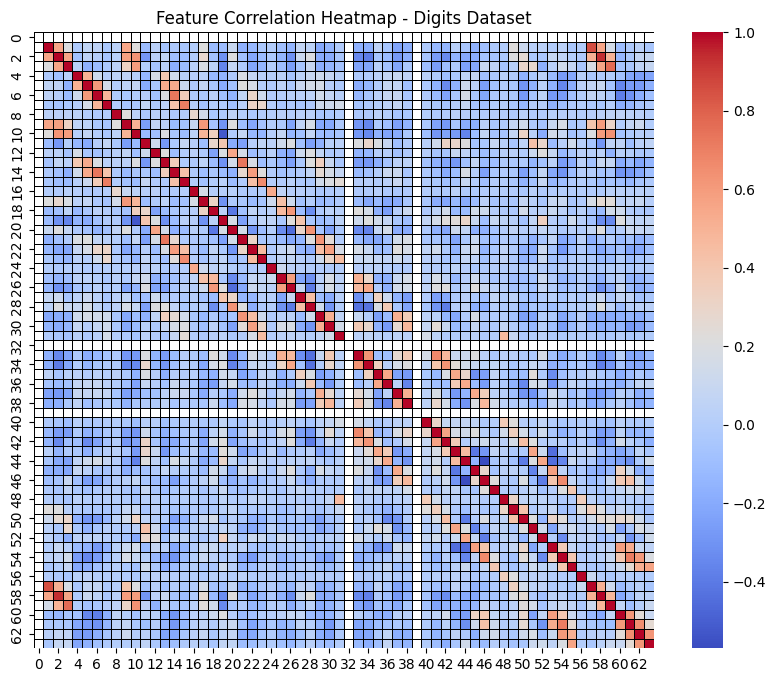

'\n# Define a high correlation threshold\nthreshold = 0.7\n\n# Identify features that are highly correlated\nhigh_corr_features = set()\nfor i in range(len(corr_matrix)):\n    for j in range(i+1, len(corr_matrix)):\n        if abs(corr_matrix[i][j]) > threshold:\n            high_corr_features.add(i)\n            high_corr_features.add(j)\n\n# Print the selected features\nprint("Features with high correlation:")\nprint(high_corr_features)\n\n'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits

# Load the digits dataset
digits = load_digits()
X = digits.data

# Calculate the correlation matrix
corr_matrix = np.corrcoef(X, rowvar=False)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title("Feature Correlation Heatmap - Digits Dataset")
plt.show()

'''
# Define a high correlation threshold
threshold = 0.7

# Identify features that are highly correlated
high_corr_features = set()
for i in range(len(corr_matrix)):
    for j in range(i+1, len(corr_matrix)):
        if abs(corr_matrix[i][j]) > threshold:
            high_corr_features.add(i)
            high_corr_features.add(j)

# Print the selected features
print("Features with high correlation:")
print(high_corr_features)

'''
